In [19]:
import sys
sys.path.append('../src')

import redshift_cross_correlation as rcc
import redshift_cc_sdss as crs
import matplotlib.pyplot as plt
import numpy as np

In [20]:
flux, wavelength = crs.get_spectrum()

Spectrum retrieved!
SDSS catalog redshift: None


Text(0.5, 0, 'Wavelength (Angstroms)')

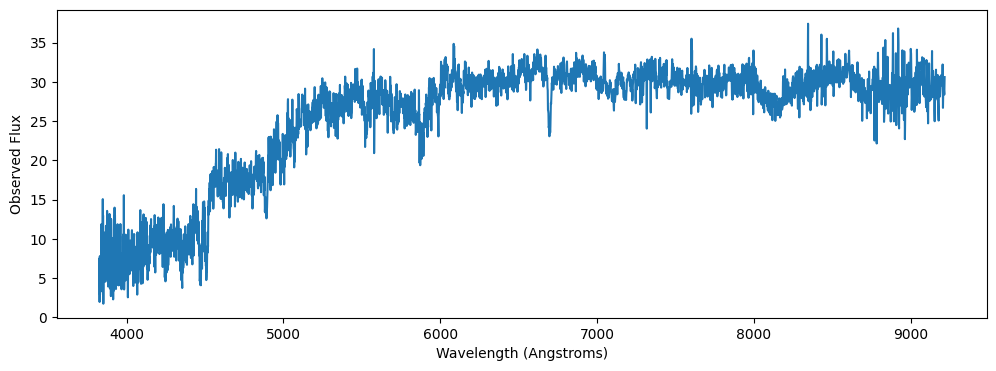

In [21]:
plt.figure(figsize=(12,4))
flux = flux.astype(np.float64)

plt.plot(wavelength, flux)
plt.ylabel("Observed Flux")
plt.xlabel("Wavelength (Angstroms)")

# Just looking, visually, it seems that the absorption lines are more prominent than rest_lines.


In [22]:
# Rest lines for this galaxy (I had to search them up. find a way to automate this.)
absorption_lines = [
    4102.89,  # H-delta
    4305.0,   # G-band (CH)
    4341.68,  # H-gamma
    4862.68,  # H-beta
    6564.61,  # H-alpha
    5175 # Weird blend MG I
]

#I dont know if it will work as intended, but i'm just going to flip my flux to measure the absorption lines
rcc.redshift_estimate_for_z(flux=-flux, wl=wavelength, rest_lines=absorption_lines, wl_max=np.max(wavelength), wl_min=np.min(wavelength))

Iteration 0: best_shift=2899, best_z=0.13562, max_corr=2960.712
Iteration 1: best_shift=2899, best_z=0.13562, max_corr=2960.712
Iteration 2: best_shift=2899, best_z=0.13562, max_corr=2960.712
Iteration 3: best_shift=2899, best_z=0.13562, max_corr=2960.712
Iteration 4: best_shift=2899, best_z=0.13562, max_corr=2960.712


np.float64(0.13561719217540502)

In [ ]:
# Real redshift of this spectrum is 0.136087
# LOOK AT FIND AMPS LATER. ONLY A TEMPORARY FIX. AHHHHHH!
#Kind of want a way to manually determine if the absoption lines are more prominent or the emmission lines in the spectrum are. not sure how to do that but yknow
# 